## Tutorial on sampling in a custom design space
_v1.0_

First we import the desired libraries:

In [8]:
from f3dasm.base.designofexperiments import DesignSpace
from f3dasm.base.space import ContinuousParameter, DiscreteParameter, CategoricalParameter
from f3dasm.sampling.samplers import RandomUniformSampling, LatinHypercubeSampling, SobolSequenceSampling
from f3dasm.base.data import Data

### Constructing the design space

There are three types of parameters that can be created: continous, discrete and categorical:

* We can create **continous** parameters with a `lower_bound` and `upper_bound` with the `ContinuousParameter` class

In [9]:
x1 = ContinuousParameter(name='x1', lower_bound=0.0, upper_bound=100.0)
x2 = ContinuousParameter(name='x2', lower_bound=0.0, upper_bound=4.0)

* We can create **discrete** parameters with a `lower_bound` and `upper_bound` with the `DiscreteSpace` class

In [10]:
x3 = DiscreteParameter('x3', lower_bound=2, upper_bound=4)
x4 = DiscreteParameter('x4', lower_bound=74, upper_bound=99)

* We can create **categorical** parameters with a list of strings (`categories`) with the `CategoricalSpace` class

In [11]:
x5 = CategoricalParameter('x5', categories=['test1','test2','test3','test4'])
x6 = CategoricalParameter('x6', categories=['material1','material2','material3'])

`output_space` can be created in the same way:

In [12]:
y = ContinuousParameter('y')

The design space is then constructed by calling the `DoE` class:

In [13]:
design = DesignSpace(input_space=[x1, x2, x3, x4, x5, x6], output_space=[y])

### Sampling from the design space

Three samplers are included in this module:
* Latin Hypercube sampling (`LatinHyperCube`)
* Random uniform sampling (`RandomUniform`)
* Sobol sequence sampling (`SobolSequencing`)

We have to feed them the designspace:

In [14]:
lhs = LatinHypercubeSampling(doe=design)
ran = RandomUniformSampling(doe=design)
sob = SobolSequenceSampling(doe=design)

We can evoke sampling by calling the `get_samples()` method and providing the number of samples:

In [15]:
N = 100 # Number of samples

data_lhs = lhs.get_samples(N)
data_ran = ran.get_samples(N)
data_sob = sob.get_samples(N)

Currently, only a 2D plotting function is implemented (`plot()`).
This function requires the two parameter names: 

/home/martin/Documents/GitHub/testthings/f3dasm/base/data.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


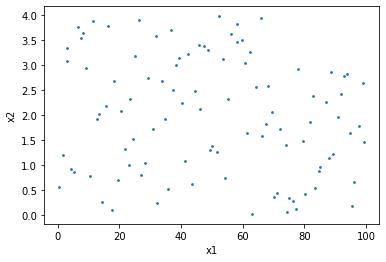

In [16]:
data_lhs.plot(input_par1='x1',input_par2='x2')

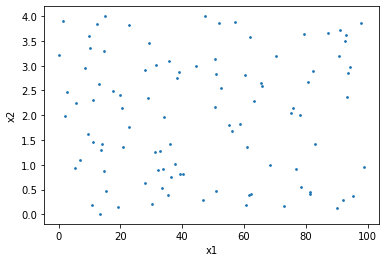

In [17]:
data_ran.plot(input_par1='x1',input_par2='x2')

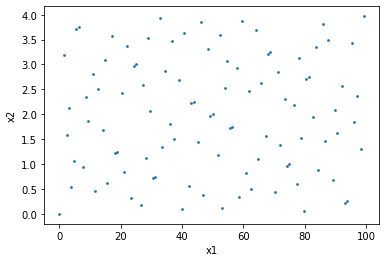

In [18]:
data_sob.plot(input_par1='x1',input_par2='x2')

Categorical or discrete parameters can also be plotted:

/home/martin/Documents/GitHub/testthings/f3dasm/base/data.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


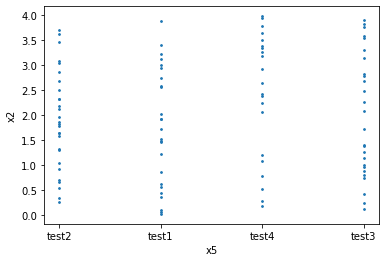

In [19]:
data_lhs.plot(input_par1='x5',input_par2='x2')